In [36]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import joblib
import numpy as np
import pandas as pd
import pickle
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("/content/combined_dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,num
0,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,2
1,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,1
2,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,0
3,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,0
4,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0


In [38]:
scaler = MinMaxScaler()
train, test = train_test_split(data, test_size=0.25)

X_train = train.drop('num', axis=1)
Y_train = train['num']

X_test = test.drop('num', axis=1)
Y_test = test['num']

In [39]:
# We don't scale targets: Y_test, Y_train as SVC returns the class labels not probability values
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

clf = LinearDiscriminantAnalysis()

In [40]:
# Training the classifier
clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [41]:
# Testing model accuracy. Average is taken as test set is very small hence accuracy varies a lot everytime the model is trained
acc = 0
acc_binary = 0
for i in range(0, 20):
    Y_hat = clf.predict(X_test)
    Y_hat_bin = Y_hat>0
    Y_test_bin = Y_test>0
    acc = acc + accuracy_score(Y_hat, Y_test)
    acc_binary = acc_binary +accuracy_score(Y_hat_bin, Y_test_bin)

print("Average test Accuracy:{}".format(acc/20))
print("Average binary accuracy:{}".format(acc_binary/20))

Average test Accuracy:0.5938864628820963
Average binary accuracy:0.8122270742358083


In [42]:
#Metrics 5 class predict
from sklearn import metrics
print(metrics.classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       102
           1       0.46      0.60      0.52        63
           2       0.46      0.18      0.26        33
           3       0.26      0.24      0.25        21
           4       0.00      0.00      0.00        10

    accuracy                           0.59       229
   macro avg       0.39      0.38      0.37       229
weighted avg       0.56      0.59      0.56       229



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Metrics 2 class predict
from sklearn import metrics
print(metrics.classification_report(Y_hat_bin, Y_test_bin))

              precision    recall  f1-score   support

       False       0.85      0.76      0.80       115
        True       0.78      0.87      0.82       114

    accuracy                           0.81       229
   macro avg       0.82      0.81      0.81       229
weighted avg       0.82      0.81      0.81       229



Confusion matrix, without normalization
[[87 28]
 [15 99]]
Confusion matrix, without normalization
[[87 10  0  5  0]
 [16 38  5  4  0]
 [ 6 16  6  5  0]
 [ 4 11  1  5  0]
 [ 2  7  1  0  0]]


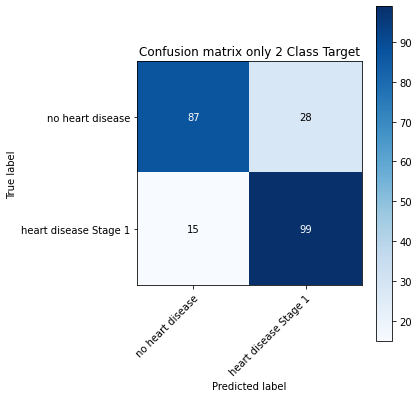

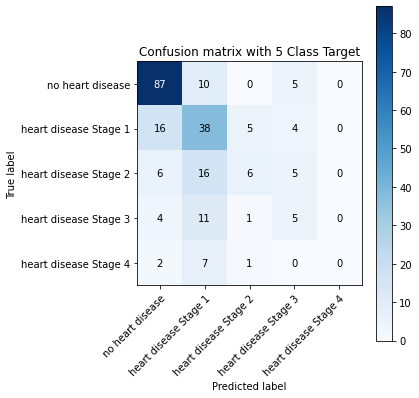

In [44]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
#Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
class_names =['no heart disease', 'heart disease Stage 1','heart disease Stage 2', 'heart disease Stage 3', 'heart disease Stage 4']
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_hat_bin, Y_test_bin, classes=class_names,
                      title='Confusion matrix only 2 Class Target')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, clf.predict(X_test), classes=class_names, 
                      title='Confusion matrix with 5 Class Target')

plt.show()